## 예제 6-3-1  다양한 시각화 그래프 알아보기

In [1]:
%matplotlib inline                              
import matplotlib.pyplot as plt                 ##  기본 시각화 모듈을 사용한다.
import seaborn as sns                           ##  판다스 등에 특화된 시각화 모듈을 사용한다. 

In [2]:
import numpy as np
import pandas as pd

In [3]:
import pyecharts.charts as cht                  ## 동적인 시각화 모듈을 사용한다. 
from pyecharts import options as opts


In [4]:
import sys

from matplotlib import font_manager, rc

if sys.platform  == 'darwin':
    path = '/Library/Fonts/AppleGothic.ttf'  
elif sys.platform == 'win32':
    path = "c:/Windows/Fonts/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [5]:

from matplotlib import style                      ##  그래프 스타일 R언어의 ggplot과 유사하도록 지정한다. 

style.use('ggplot')

In [6]:
labels = ['삼성전자', 'SK하이닉스', 'LG전자', '네이버', '카카오']   ## 리스트로 레이블에 들어갈 이름을 작성한다.
ratio = [50, 20, 10, 10, 10]                                        ## 원그래프에 들어갈 값을 비율에 맞춰 만든다

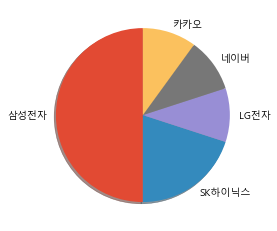

In [7]:
plt.pie(ratio, labels=labels, shadow=True, startangle=90)    ## 파이그래프를 그린다.
plt.show()

In [8]:
pie = cht.Pie()                                              ## 파이 그래프 객체를 만든다. 

pie.add("회사 규모 ", zip(labels, ratio), radius=100)           ## 그래프 내의 레이블과 데이터를 지정한다. 
                                                                ## 제목과 부제목을 지정하다. 
                                                      
pie .set_global_opts(title_opts=opts.TitleOpts(title="주요 기업", subtitle="2017-2018 Revenue"),
                     toolbox_opts=opts.ToolboxOpts())                 ## 툴박스도 지정한다
pie.render_notebook()                                                 ## 주피터노트북에 출력을 표시한다.

In [9]:
pie = cht.Pie()

pie.add("회사 규모 ", zip(labels, ratio), radius=[40, 75])    ## 파이 내부를 빈 공간으로 만들기 위ㅐ 반지름의 범위를 지정한다.

pie .set_global_opts(title_opts=opts.TitleOpts(title="주요 기업", subtitle="2017-2018 Revenue"),
                     toolbox_opts=opts.ToolboxOpts())
pie.render_notebook()

In [10]:
                                          ## seaborn 내부의 데이터 종류이면 로딩하면 데이터프레임으로 만들어진다.
iris = sns.load_dataset("iris")           # 붓꽃 데이터
titanic = sns.load_dataset("titanic")     # 타이타닉호 데이터
tips = sns.load_dataset("tips")           # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

In [11]:
tips.head()                                           ## 팁 데이터의 확인한다.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
tips['size'].value_counts()                             ## 팁 내의 size 열을 조회하고 내부의 데이터의 개수를 확인한다.

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

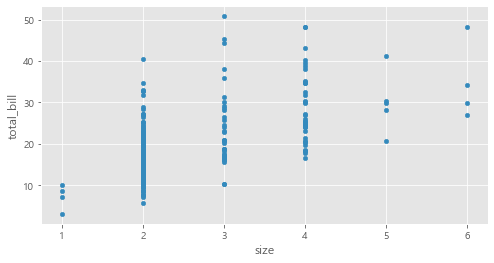

In [13]:
                                                                    ## 데이터프레임은 plot 메소드로 그래프를 바로 그릴 수 있다. 
tips.plot(x='size', y='total_bill',kind='scatter', figsize=(8,4))   ## x 축은 size 열, y 축을 total_bill을 넣는다 
plt.show()                                                          ## 그래프는 kind 매개변수에 scatter로 지정해서 산포도 그래프를 그린다.
                                                                    ## 그래프의 크기는 figsize에 지정한다

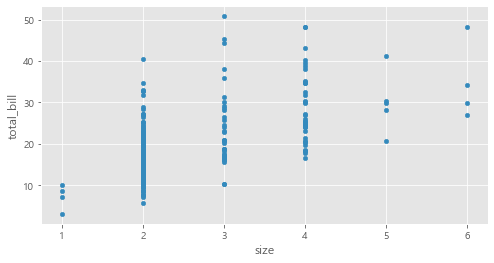

In [14]:
tips.plot.scatter(x='size', y='total_bill', figsize=(8,4))           ## 직접 scatter 메소드로 그래프를 그린다.
plt.show()

In [15]:
try :
    tips.plot.scatter(x='day', y='total_bill', figsize=(8,4))            ## 숫자가 아닌 경우를 x축에 넣으면 예외를 발생시킨다. 
    plt.show()
except Exception as e :
    print(e)

scatter requires x column to be numeric


In [16]:
tips['day'].value_counts()                              ## 요일에 대한 발생일 수를 확인한다. 

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

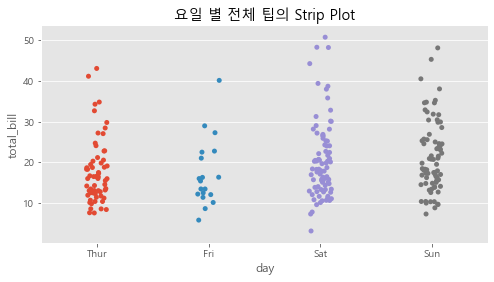

In [36]:
fig, ax = plt.subplots(figsize=(8,4))                                  ## 기본 그래프로 캔버스와 AXES를 만든다. 
sns.stripplot(x="day", y="total_bill", data=tips, ax=ax)               ## 시본에서 제공하는 stripplot 함수를 사용한다.
                                                                        ## 두 축은 문자열로 데이터프레임의 열의 이름을 지정한다. 
                                                                        ## data에 실제 데이터프레임을 전달한다. 
                                                                        ## ax에 axes 객체를 전달한다.
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

In [18]:
scatter = cht.Scatter()                                         ## 파이이차트의 산포도 그래프 객체를 만든다.
                            
scatter.add_xaxis( tips['size']).add_yaxis("total bill",            ## x축에는 size 열, y축에는 total_bill열을 넣는다.
                                           tips['total_bill'], 
                                           symbol_size=20)          ## symbol의 크기를 지정한다.
                


scatter.set_global_opts(title_opts=opts.TitleOpts(title="Tips "),
                     toolbox_opts=opts.ToolboxOpts())

scatter.render_notebook()

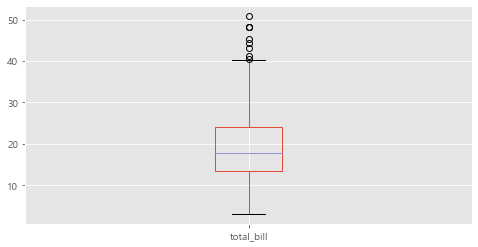

In [19]:
tips.plot.box(y= 'total_bill',figsize=(8,4))                         ## 데이터프레임에서 상자 그래프를 그린다. 
plt.show()

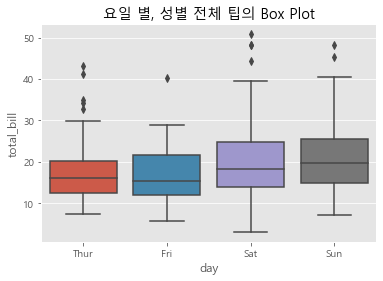

In [20]:
sns.boxplot(x="day", y="total_bill", data=tips)                ## 시본을 사용해서 상자그래프를 그린다. 
                                                               ## 요일별로 지정해서 4개의 상자그래프가 나온다. 
plt.title("요일 별, 성별 전체 팁의 Box Plot") 
plt.show()

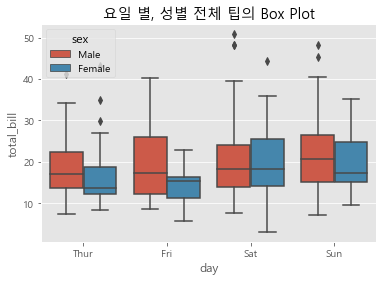

In [21]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)  ## hue에 sex 열을 지정하면 상자그래프를 요일별 성별로 분리한다.
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

In [22]:
gr = tips.groupby('day')                       ## 데이터프레임을  요일별로 그룹화 처리하기

In [23]:
tips['day'].value_counts()                  ## 실제 요일은 4개로 분류할 수 있다. 이는 4개로 그룹화처리가 가능하다.

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [24]:
tips['day'].value_counts().index.categories           ## 요일에 대한 그룹화 정보를 확인할 수 있다. 

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

In [25]:
tips['day'].value_counts().index.categories.values

array(['Thur', 'Fri', 'Sat', 'Sun'], dtype=object)

In [26]:
a = tips['day'].value_counts().index.categories.values.tolist()   ## 이 그룹화 정보를 하나의 리스트로 저장한다 

In [27]:
a

['Thur', 'Fri', 'Sat', 'Sun']

In [39]:
y_axis = list()                                                ## 빈 리스트를 하나 만든다

In [40]:
for  v in a :
    y_axis.append(gr.get_group(v)['total_bill'].tolist())       ## 빈 리스트에 요일별 그룹화 정보를 넣는다.
                                                                ## 리스트 내부에 리스트를 넣는다.

In [41]:
y_axis_ = pd.DataFrame(y_axis)                                ## 이를 데이터 프레임으로 변환한다. 

In [42]:
y_axis_ = y_axis_.fillna(0)                                  ## 결측값은 0으로 처리한다. 

In [32]:
y_axis_t = []

for i in range(4) :
    y_axis_t.append(y_axis_.iloc[i].tolist())              ## 데이터프레임을 다시 리스트로 변환한다

In [33]:
boxplot = cht.Boxplot()

boxplot.add_xaxis(tips['day'].value_counts().index.categories.values.tolist())    ## x축은 요일을 출력

boxplot.add_yaxis("total bill",y_axis_t)                                         ## y축은 요일별로 가진 리스트를 전달한다.

boxplot.set_global_opts(title_opts=opts.TitleOpts(title="Tips "),
                     toolbox_opts=opts.ToolboxOpts())

boxplot.render_notebook()

#### 책에는 반영하지 않음

In [34]:
box_plot = cht.Boxplot()

box_plot = (
    box_plot.add_xaxis(a)
    .add_yaxis("total bill",y_axis_t)
    .set_global_opts(
        title_opts=opts.TitleOpts(
            pos_left="left", title="요일별 팁 "
        ),
        tooltip_opts=opts.TooltipOpts(trigger="item", axis_pointer_type="shadow"),
        xaxis_opts=opts.AxisOpts(
            type_="category",
            boundary_gap=True,
            splitarea_opts=opts.SplitAreaOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(formatter="{value}"),
            splitline_opts=opts.SplitLineOpts(is_show=False),
        ),
        yaxis_opts=opts.AxisOpts(
            type_="value",
            name="금액",
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
    )
    .set_series_opts(tooltip_opts=opts.TooltipOpts(formatter="{b}: {c}"))
)
box_plot.render_notebook()